# **Obtención del Dataset o Tabla de Salida**
La "Tabla de Salida" es el dataset final con los datos limpios, comprendiendo sólo las columnas relevantes, las variables numéricas escaladas y las categóricas convertidas a dummies.
A continuación detallamos el procedimiento para obtenerla.

In [51]:
#Importación de librerías requeridas
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [52]:
#Lectura de la tabla origen y generaración de un dataframe a partir de ella
ruta_archivo_csv = '/content/Tabla_Origen.csv'
df = pd.read_csv(ruta_archivo_csv, sep=',', error_bad_lines=False)

#Procesamiento de datos, incluyendo manejo de valores nulos y conversión de la duración de las pistas de milisegundos a segundos

df = df.fillna(0)  # Manejo de valores nulos
df = df.dropna()  # Manejo de valores nulos
df['duration_ms'] = df['duration_ms'] / 1000  # Convertir duración a segundos
df.columns = df.columns.str.replace('_', ' ') #Reemplazar "_" por espacios en los nombres de las columnas del dataframe

<ipython-input-52-30ee31a68ddf>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(ruta_archivo_csv, sep=',', error_bad_lines=False)
Skipping line 2318: expected 11 fields, saw 12
Skipping line 3202: expected 11 fields, saw 12
Skipping line 4992: expected 11 fields, saw 12
Skipping line 5403: expected 11 fields, saw 12
Skipping line 6298: expected 11 fields, saw 12
Skipping line 7062: expected 11 fields, saw 12
Skipping line 7207: expected 11 fields, saw 12
Skipping line 8165: expected 11 fields, saw 12
Skipping line 9260: expected 11 fields, saw 12
Skipping line 9839: expected 11 fields, saw 12
Skipping line 13342: expected 11 fields, saw 12
Skipping line 13726: expected 11 fields, saw 12
Skipping line 14702: expected 11 fields, saw 12
Skipping line 15827: expected 11 fields, saw 12
Skipping line 15956: expected 11 fields, saw 12
Skipping line 16418: expected 11 fields, saw 12

In [53]:
#Validar el dataframe resultante
df

,playlist name,playlist pid,playlist num followers,album name,album uri,artist name,artist uri,duration ms,pos,track name,track uri
0,Party,1000000,70,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,AronChupa,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,163.809,0.0,Little Swing,spotify:track:66U0ASk1VHZsqIkpMjKX3B
1,Party,1000000,70,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,AronChupa,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,166.848,1.0,I'm an Albatraoz,spotify:track:5MhsZlmKJG6X5kTHkdwC4B
2,Party,1000000,70,Yellow Flicker Beat,spotify:album:4UEPxQx0cTcYNsE0n32MHV,Lorde,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,232.506,2.0,Yellow Flicker Beat - From The Hunger Games: M...,spotify:track:0GZoB8h0kqXn7XFm4Sj06k
3,Party,1000000,70,Pure Heroine,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,Lorde,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,216.600,3.0,White Teeth Teens,spotify:track:35kahykNu00FPysz3C2euR
4,Party,1000000,70,Pure Heroine,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,Lorde,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,193.058,4.0,Team,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1
...,...,...,...,...,...,...,...,...,...,...,...
280704,Playlist 2015,1006767,20,Salsa Classics Revisited,spotify:album:2QeEEn8jNy5SFx9coIzS3Z,El Gran Combo De Puerto Rico,spotify:artist:6nnspeopmJAG07xOxHmqTu,339.573,0.0,Y No Hago Mas Na' - Reggaeton Mix,spotify:track:38griAVM808crjbFp9gcPD
280705,Workout,1006771,24,Greatest Hits,spotify:album:3PO9OtQdvCDJN8zDLtZiYd,2Pac,spotify:artist:1ZwdS5xdxEREPySFridCfh,285.026,0.0,California Love - Original Version,spotify:track:1JClFT74TYSXlzpagbmj0S
280706,Girlz,1006773,16,Be You,spotify:album:5NjFyeZJkYAh5ri9eh8ZSO,Ashley DuBose,spotify:artist:2Y9lO01ABSO8OkBU8FI1mp,279.322,0.0,Intoxicated,spotify:track:4InLm5a9Qtkru6YxEjM4Qc
280707,let's get lost,1006775,35,Deadroses,spotify:album:1TkwzY3l4LqAfrQwBAx45Q,blackbear,spotify:artist:2cFrymmkijnjDg9SS92EPM,223.295,0.0,90210 (feat. G-Eazy),spotify:track:4hdog9vyyqG9pcppG2Izek


In [54]:
# Seleccionar campos numéricos
numeric_fields = ['playlist num followers', 'duration ms', 'pos']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_fields].corr()

print(correlation_matrix)


                        playlist num followers  duration ms       pos
playlist num followers                1.000000     0.009634  0.165045
duration ms                           0.009634     1.000000 -0.013660
pos                                   0.165045    -0.013660  1.000000


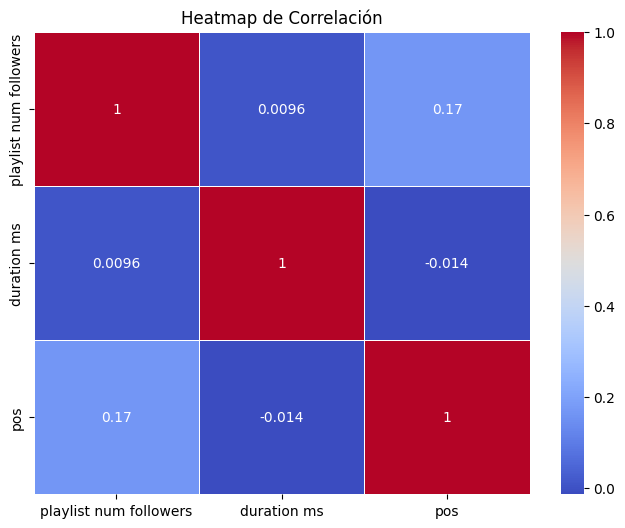

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()


In [60]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Ejemplo de datos de interacciones de usuarios con pistas
user_playlist_interactions = df.iloc[:1000]

# Asegurarnos de que las etiquetas de usuarios y pistas sean cadenas
user_playlist_interactions['playlist pid'] = user_playlist_interactions['playlist pid'].astype(str)
user_playlist_interactions['track uri'] = user_playlist_interactions['track uri'].astype(str)

# Codificación de etiquetas para pistas y usuarios
label_encoder = LabelEncoder()
user_playlist_interactions['playlist pid'] = label_encoder.fit_transform(user_playlist_interactions['playlist pid'])
user_playlist_interactions['track uri'] = label_encoder.fit_transform(user_playlist_interactions['track uri'])

# Creación de una matriz de preferencias de usuarios utilizando pivot_table
user_track_preferences = user_playlist_interactions.pivot_table(index='playlist pid', columns='track uri', values='playlist num followers', aggfunc='mean').fillna(0)

# Cálculo de la similitud de coseno entre pistas basado en preferencias de usuarios
track_similarity = cosine_similarity(user_track_preferences)

track_similarity
df

<ipython-input-60-2651396d27e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_playlist_interactions['playlist pid'] = user_playlist_interactions['playlist pid'].astype(str)
<ipython-input-60-2651396d27e9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_playlist_interactions['track uri'] = user_playlist_interactions['track uri'].astype(str)
<ipython-input-60-2651396d27e9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,playlist name,playlist pid,playlist num followers,album name,album uri,artist name,artist uri,duration ms,pos,track name,track uri
0,1736,1000000,70,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,AronChupa,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,163.809,0.0,26774,spotify:track:66U0ASk1VHZsqIkpMjKX3B
1,1736,1000000,70,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,AronChupa,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,166.848,1.0,22160,spotify:track:5MhsZlmKJG6X5kTHkdwC4B
2,1736,1000000,70,Yellow Flicker Beat,spotify:album:4UEPxQx0cTcYNsE0n32MHV,Lorde,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,232.506,2.0,52527,spotify:track:0GZoB8h0kqXn7XFm4Sj06k
3,1736,1000000,70,Pure Heroine,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,Lorde,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,216.600,3.0,51330,spotify:track:35kahykNu00FPysz3C2euR
4,1736,1000000,70,Pure Heroine,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,Lorde,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,193.058,4.0,43582,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1
...,...,...,...,...,...,...,...,...,...,...,...
280704,1773,1006767,20,Salsa Classics Revisited,spotify:album:2QeEEn8jNy5SFx9coIzS3Z,El Gran Combo De Puerto Rico,spotify:artist:6nnspeopmJAG07xOxHmqTu,339.573,0.0,52412,spotify:track:38griAVM808crjbFp9gcPD
280705,2519,1006771,24,Greatest Hits,spotify:album:3PO9OtQdvCDJN8zDLtZiYd,2Pac,spotify:artist:1ZwdS5xdxEREPySFridCfh,285.026,0.0,6966,spotify:track:1JClFT74TYSXlzpagbmj0S
280706,992,1006773,16,Be You,spotify:album:5NjFyeZJkYAh5ri9eh8ZSO,Ashley DuBose,spotify:artist:2Y9lO01ABSO8OkBU8FI1mp,279.322,0.0,23166,spotify:track:4InLm5a9Qtkru6YxEjM4Qc
280707,3214,1006775,35,Deadroses,spotify:album:1TkwzY3l4LqAfrQwBAx45Q,blackbear,spotify:artist:2cFrymmkijnjDg9SS92EPM,223.295,0.0,783,spotify:track:4hdog9vyyqG9pcppG2Izek


In [57]:

# Ejemplo de datos de interacciones de usuarios con pistas
user_playlist_interactions = df

user_playlist_interactions['playlist name'] = user_playlist_interactions['playlist name'].astype(str)
user_playlist_interactions['track name'] = user_playlist_interactions['track name'].astype(str)

# Codificación de etiquetas para pistas y usuarios
label_encoder = LabelEncoder()
user_playlist_interactions['playlist name'] = label_encoder.fit_transform(user_playlist_interactions['playlist name'])
user_playlist_interactions['track name'] = label_encoder.fit_transform(user_playlist_interactions['track name'])

# Creación de una matriz de preferencias de usuarios utilizando pivot_table
user_track_preferences = user_playlist_interactions.pivot_table(index='playlist name', columns='track name', values='playlist num followers', aggfunc='mean').fillna(0)

# Cálculo de la similitud de coseno entre pistas basado en preferencias de usuarios
track_similarity = cosine_similarity(user_track_preferences)

# Crear un modelo de recomendación basado en la similitud de coseno
model = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute', leaf_size=30, n_jobs=-1)
model.fit(track_similarity)

# Ejemplo de recomendación para una pista de referencia
reference_track = 10  # Cambiar esto al índice de la pista de referencia
distances, indices = model.kneighbors(track_similarity[reference_track].reshape(1, -1), n_neighbors=5)

# Recomendar pistas similares
recommended_tracks = user_playlist_interactions.iloc[indices[0]]['track name'].tolist()

print("Pistas recomendadas para la pista de referencia:", recommended_tracks)


Pistas recomendadas para la pista de referencia: [4624, 34791, 53710, 1857, 36509]


In [58]:
user_track_preferences

track name,0,1,2,3,4,5,6,7,8,9,...,53908,53909,53910,53911,53912,53913,53914,53915,53916,53917
playlist name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
